In [3]:
import pandas as pd 
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from wordcloud import WordCloud


In [4]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [5]:
data=pd.read_csv('UpdatedResumeDataSet.csv.zip')

In [6]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
#### Understanding Dataset in EDA

In [7]:
data.shape

(962, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [9]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [10]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [11]:
data['Category'].nunique()

25

In [12]:
Categories=data['Category'].value_counts().reset_index()


In [13]:
Categories

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


<Axes: xlabel='Category', ylabel='count'>

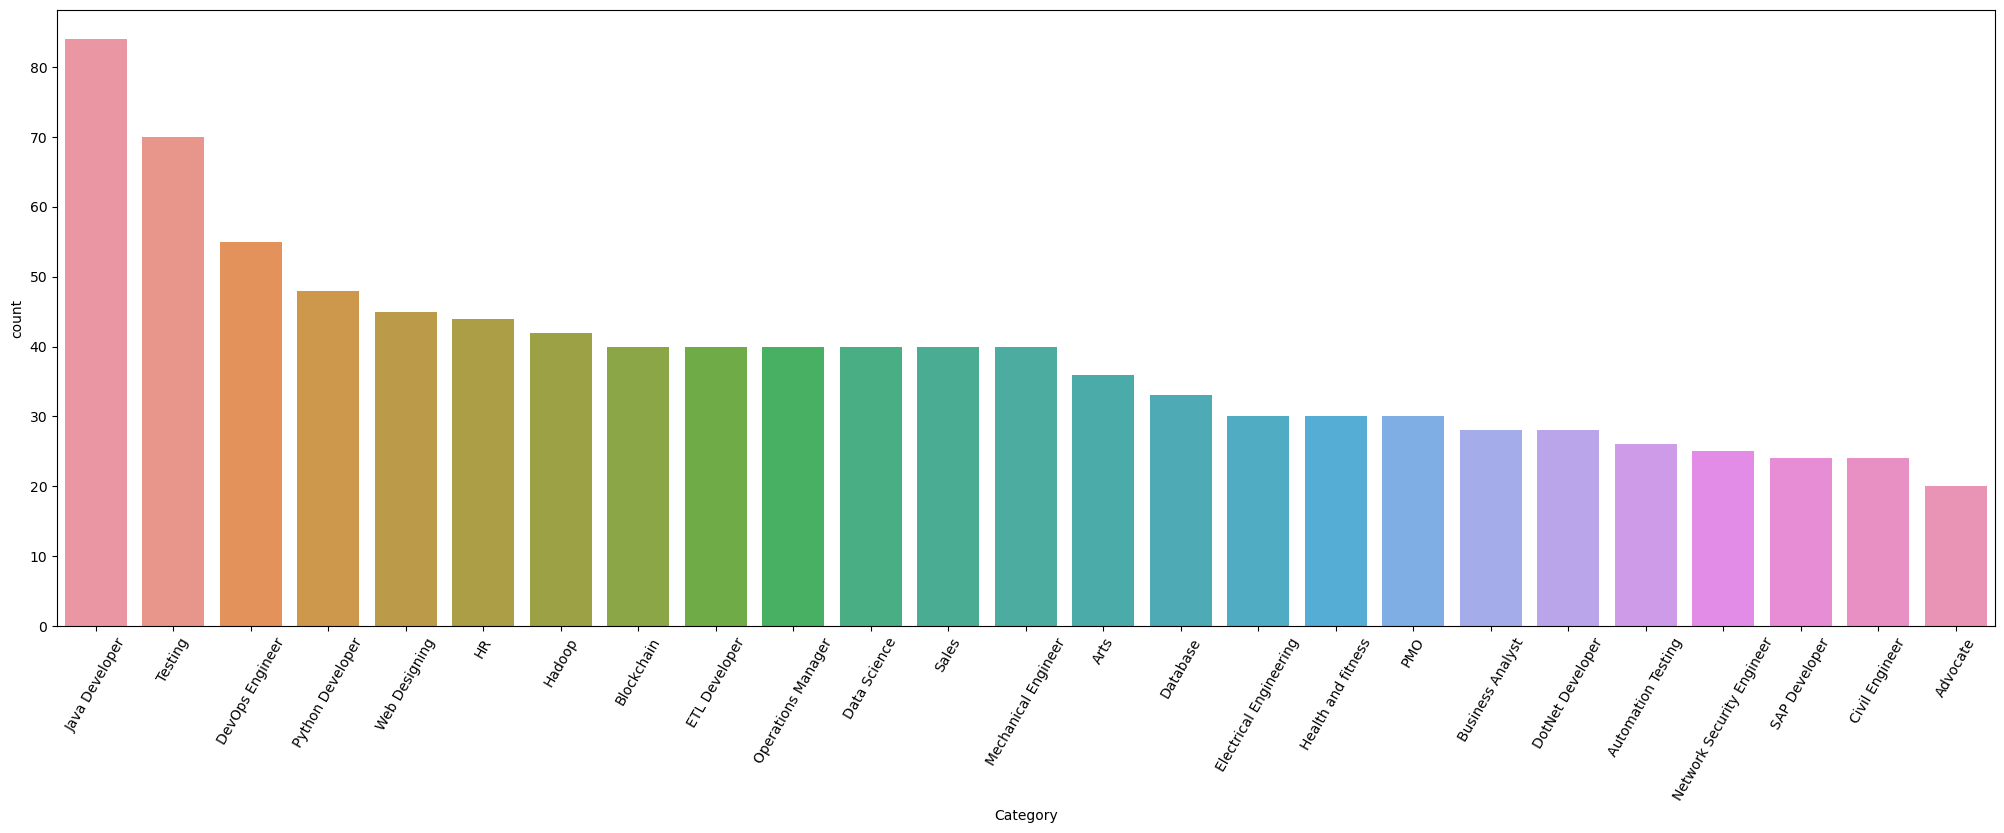

In [14]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data= data, order= data['Category'].value_counts().index)
 
# Show the plot

In [15]:
plt.figure(figsize=(25,8))

#define Seaborn color palette to use
colors= sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(categories['Category'], labels= Category['index'].astype(str), colors = colors, autopct='%.1f%%')
plt.show()

NameError: name 'categories' is not defined

<Figure size 2500x800 with 0 Axes>

In [ ]:
#### Preprocessing


In [16]:
data1=data.copy()

In [17]:
data1

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [18]:
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText


In [19]:
data1['cleaned_resume']=data1['Resume'].apply(lambda x:clean_function(x))
data1.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
#### encode the Category column

In [20]:
from sklearn.preprocessing import LabelEncoder
data2=data1.copy()
data2['Category']= LabelEncoder().fit_transform(data2['Category'])


In [21]:
data2.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [76]:
data2.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [ ]:
### create wordcloud:

In [22]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [23]:
setofStopWords=set(stopwords.words('english')+['``',"''"])

In [24]:
setofStopWords

{"''",
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over

In [25]:
totalWords=[]

In [26]:
 Sentences=data2['Resume'].values

In [27]:
cleanedSentences= ""

In [28]:
for records in Sentences:
    cleanedText= clean_function(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in setofStopWords and word not in string.punctuation:
            totalWords.append(word)

In [29]:
wordfreqdist=nltk.FreqDist(totalWords)

In [30]:
wordfreqdist

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

In [31]:
mostcommon=wordfreqdist.most_common(30)

In [32]:
mostcommon

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746)]

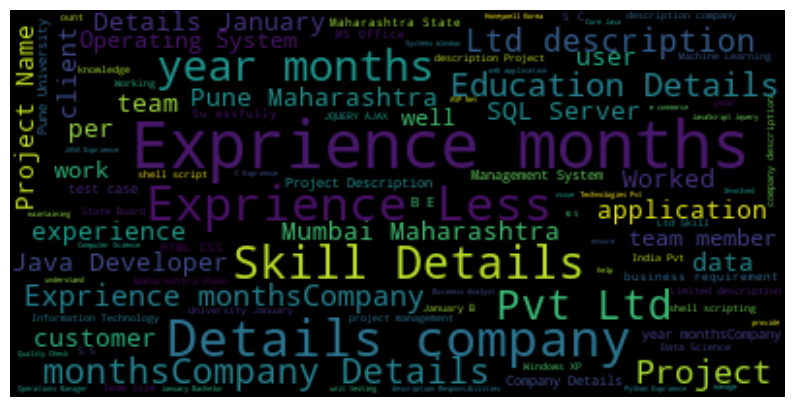

In [33]:
wordCloud=WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy .sparse import hstack

In [35]:
text=data2['cleaned_resume'].values
terget=data2['Category'].values

In [36]:
# Here we will preprocess and convert the ‘cleaned_resume’ column into vectors.
# We will be using the ‘Tf-Idf’ method to get the vectors:

In [38]:
word_vectorizer=TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(text)
wordfeatures=word_vectorizer.transform(text)

### we have word Features' as vectors and Target and target after this step

In [39]:
wordfeatures.shape

(962, 7351)

In [42]:
x_train,x_test,y_train, y_test=train_test_split(wordfeatures,terget,random_state=42)

In [43]:
print(x_train.shape)
print(x_test.shape)

(721, 7351)
(241, 7351)


In [ ]:
# We have trained and tested the data and now let’s build the models:

In [44]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
models={
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(),
    'Support Vector Machine':SVC(),
    'Random Forest':RandomForestClassifier(),
     #"GradientBoosting":GradientBoostingClassifier
    
    }

In [53]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [56]:
for i in model_list:
    i.fit(x_train,y_train)
    print(f'{i}trained')
    
print('*'*95)
print('all model trained')

OneVsRestClassifier(estimator=KNeighborsClassifier())trained
OneVsRestClassifier(estimator=LogisticRegression())trained
OneVsRestClassifier(estimator=SVC())trained
OneVsRestClassifier(estimator=RandomForestClassifier())trained
***********************************************************************************************
all model trained


In [64]:
for count, value in enumerate(model_list):
    print(f"accuracy of {value} on training set:", model_list[count].score(x_train,y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(x_test, y_test))     
    print("*"*100)
    
print("all score calculated")

accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set: 0.9805825242718447
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.966804979253112
****************************************************************************************************
accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set: 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.991701244813278
****************************************************************************************************
accuracy of OneVsRestClassifier(estimator=SVC()) on training set: 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.991701244813278
****************************************************************************************************
accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set: 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on test 

In [65]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [68]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print('&'*87)
    print(classification_report(y_test, model_list[count].predict(x_test)))
    print("*"*95)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9
           6       0.88      0.78      0.82         9
           7       1.00      0.89      0.94         9
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00         6
          14       1.00  

# Cross Validation for Models

In [71]:
from sklearn.model_selection import cross_val_score,KFold

In [73]:
results={}
kf=KFold(n_splits=10)
for count, value in enumerate(model_list):
    result = cross_val_score(model_list[count], x_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = result

In [74]:
print('r2 scores')
print("************************************")
for name, result in results.items():
    
    
    print(f'{name}:{round(np.mean(result),3)}')
    print('@@@@@@@@@@@@@@@@@@@@@')

r2 scores
************************************
OneVsRestClassifier(estimator=KNeighborsClassifier()):0.958
@@@@@@@@@@@@@@@@@@@@@
OneVsRestClassifier(estimator=LogisticRegression()):0.99
@@@@@@@@@@@@@@@@@@@@@
OneVsRestClassifier(estimator=SVC()):0.997
@@@@@@@@@@@@@@@@@@@@@
OneVsRestClassifier(estimator=RandomForestClassifier()):0.996
@@@@@@@@@@@@@@@@@@@@@
